# Курсовой проект

# Фундаментальные концепции искусственного интеллекта

Студент **Морозов Артем Борисович**

Группа **М8О-109СВ-24**

# Краткое описание датасета
Ссылка на датасет https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

Описание:

Датасет содержит информацию о более чем 32 000 людях. Каждый экземпляр описан набором следующих атрибутов:

age — Возраст человека (целое число).

workclass — Тип занятости: частный сектор, государственная служба и т.д. (категориальный).

fnlwgt — Взвешенное количество людей, похожих на данного человека (целое число).

education — Уровень образования (категориальный), например, бакалавр, магистр и т.д.

education-num — Количественный эквивалент уровня образования (целое число).

marital-status — Семейное положение (категориальный), например, женат, разведён и т.д.

occupation — Профессия человека (категориальный), например, менеджер, продавец и т.д.

relationship — Тип отношений в семье (категориальный), например, муж, жена, дети и т.д.

race — Расовая принадлежность (категориальный), например, белый, чернокожий и т.д.

sex — Пол человека (категориальный), мужской или женский.

capital-gain — Прибыль от продажи активов (целое число).

capital-loss — Убытки от продажи активов (целое число).

hours-per-week — Количество часов, работаемых в неделю (целое число).

native-country — Страна происхождения (категориальный), например, США, Канада и т.д.

income — Целевая переменная: доход человека (категориальный), больше или меньше 50 000 долларов в год.

# Загрузчик данных

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
    'hours-per-week', 'native-country', 'income'
]
data = pd.read_csv(url, names=column_names, sep=',\s', engine='python')
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Статистика

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
num_records = data.shape[0]
num_features = data.shape[1]

size_per_record = data.memory_usage(deep=True).sum() / num_records * 8  # в битах

data_types = data.dtypes

missing_data = data.isnull().sum()

missing_percent = (missing_data / num_records) * 100

income_distribution = data['income'].value_counts(normalize=True) * 100

numeric_stats = data.describe()

categorical_unique = data.select_dtypes(include=['object']).nunique()

numeric_median = data.median()
numeric_std = data.std()

categorical_stats = data.select_dtypes(include=['object']).describe()

print(f"Количество записей: {num_records}")

Количество записей: 32561


C:\Users\artem\AppData\Local\Temp\ipykernel_12204\523268812.py:20: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  numeric_median = data.median()
C:\Users\artem\AppData\Local\Temp\ipykernel_12204\523268812.py:21: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  numeric_std = data.std()


In [63]:
print(f"Количество признаков: {num_features}")
print(f"Объём 1 записи в битах: {size_per_record:.2f} бит")
print("\nТипы данных:")
print(data_types)

Количество признаков: 15
Объём 1 записи в битах: 5122.33 бит

Типы данных:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [59]:
print("\nКоличество пропусков в каждом признаке:")
print(missing_data)
print("\nПроцент пропусков в каждом признаке:")
print(missing_percent)


Количество пропусков в каждом признаке:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Процент пропусков в каждом признаке:
age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64


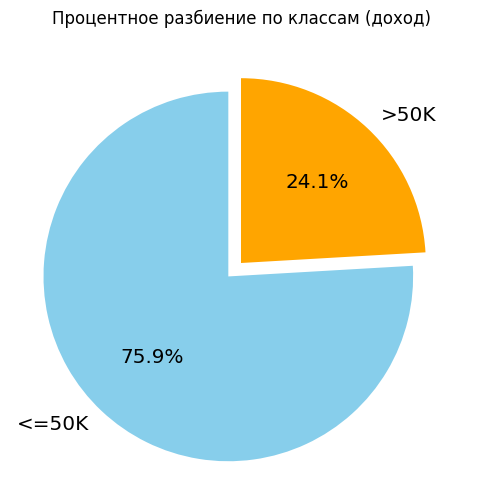

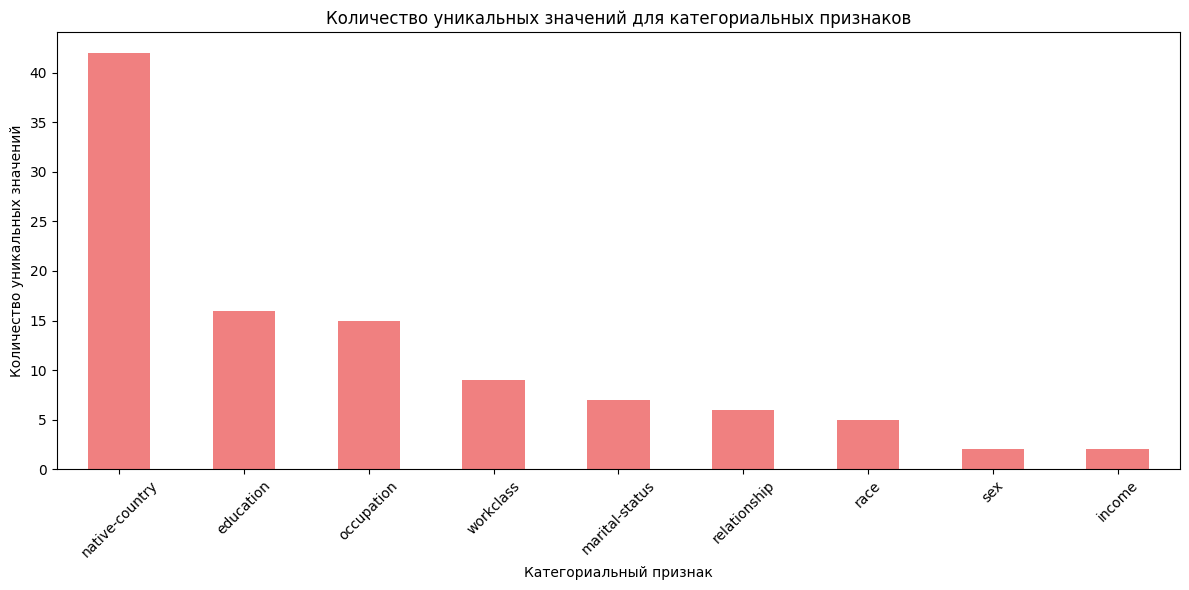

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_income_distribution(income_distribution):
    plt.figure(figsize=(8, 6))
    income_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], 
                             explode=(0.1, 0), textprops={'size': 'x-large'})
    plt.title('Процентное разбиение по классам (доход)')
    plt.ylabel('')
    plt.show()
    
def plot_categorical_unique(categorical_unique):
    plt.figure(figsize=(12, 6))
    categorical_unique.sort_values(ascending=False).plot(kind='bar', color='lightcoral')
    plt.title('Количество уникальных значений для категориальных признаков')
    plt.xlabel('Категориальный признак')
    plt.ylabel('Количество уникальных значений')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_income_distribution(income_distribution)
plot_categorical_unique(categorical_unique)

In [55]:
print("\nМедиана числовых признаков:")
print(numeric_median)
print("\nСтандартное отклонение числовых признаков:")
print(numeric_std)
print("\nСтатистика по категориальным признакам:")
print(categorical_stats)


Медиана числовых признаков:
age                   37.0
fnlwgt            178356.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64

Стандартное отклонение числовых признаков:
age                   13.640433
fnlwgt            105549.977697
education-num          2.572720
capital-gain        7385.292085
capital-loss         402.960219
hours-per-week        12.347429
dtype: float64

Статистика по категориальным признакам:
       workclass education      marital-status      occupation relationship  \
count      32561     32561               32561           32561        32561   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native-country income  
count   32561  32561          32561  32561  
unique      5   

# Алгоритм
1. Задача:
Мы решаем задачу бинарной классификации, где целевая переменная (income) имеет два класса: <=50K — доход меньше или равен $50,000, >50K — доход больше $50,000.
2. Алгоритм:
Для решения этой задачи можно использовать несколько популярных методов классификации, таких как Logistic Regression, Random Forest, Support Vector Machine (SVM) и Gradient Boosting. Выбор упал на Random Forest как на достаточно мощный и устойчивый алгоритм для таких задач.
3. Метрики:
Используем precision, recall, F1-score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])
data = pd.get_dummies(data)
X = data.drop('income', axis=1)
y = data['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(class_weight='balanced', random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

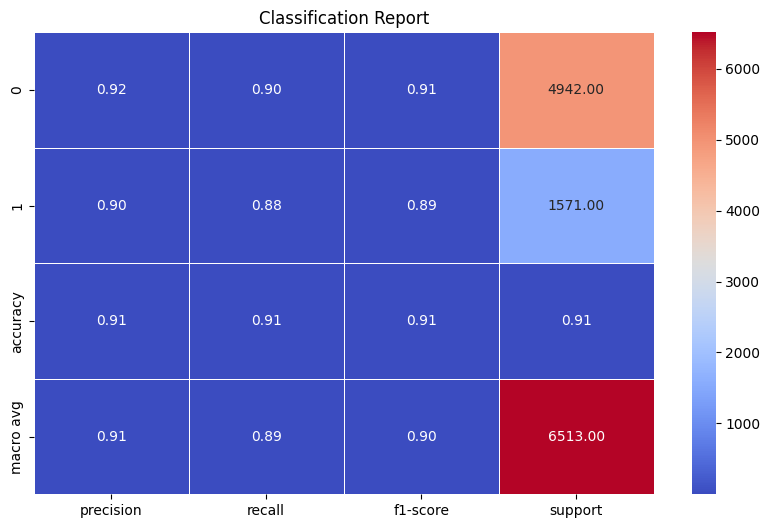

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Classification Report')
plt.show()

# Кластеризация

C:\Users\artem\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


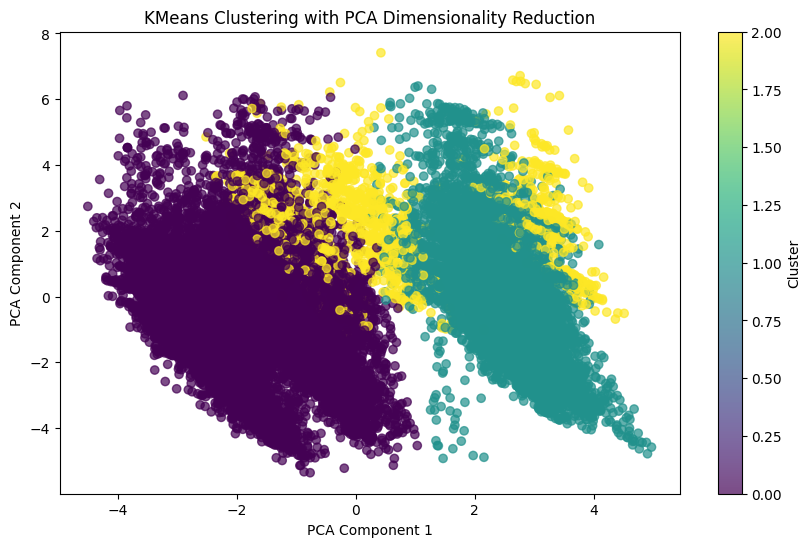


Cluster centers in original space:
[[-2.59427739e-01  1.87613790e-02 -4.46383148e-02 -7.13508142e-02
  -6.17948838e-02 -1.70869729e-01 -2.44450198e-01  5.50265317e-04
   1.76219758e-02 -1.46638105e-02  1.92218798e-01 -9.18940065e-02
  -8.72917868e-02  2.00042930e-02  3.53211953e-03  5.19315771e-03
   3.40437414e-02  2.54537612e-02 -3.34286229e-03 -8.29080212e-03
  -3.48220010e-02 -6.43399145e-03  1.94357578e-02 -6.69558996e-03
  -2.31578353e-02 -4.43974733e-02  8.93752776e-03 -3.60775124e-02
   7.04829322e-03 -5.82760728e-02  4.64048771e-02  2.94221598e-01
  -1.33433031e-03 -7.50980929e-01  7.86646306e-02  4.81167075e-01
   1.26785747e-01  9.54443522e-02 -2.44943658e-01  1.90133489e-01
   3.55250021e-03 -1.16566805e-01 -6.43506608e-02 -3.67280371e-02
   4.88607297e-02  2.39414026e-03  1.79088047e-01  5.48010962e-02
   6.85865446e-03 -3.34021497e-02  2.21571086e-02  2.25935962e-02
  -6.71138635e-02 -8.25333347e-01  4.20962961e-01  1.05359643e-01
   2.63279231e-01  2.49918553e-01  1.464

In [46]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])
data = pd.get_dummies(data)
X = data.drop('income', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
data['cluster'] = kmeans.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.7)
plt.title('KMeans Clustering with PCA Dimensionality Reduction')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
print("\nCluster centers in original space:")
print(kmeans.cluster_centers_)
print("\nCluster distribution in data:")
print(data['cluster'].value_counts())

# Выбросы

In [ ]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import numpy as np
label_encoder = LabelEncoder()
data['income'] = label_encoder.fit_transform(data['income'])
data = pd.get_dummies(data)
X = data.drop('income', axis=1)

#  Метод межквартильного размаха (IQR)
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
outliers_iqr = detect_outliers_iqr(X)
print("Outliers based on IQR method:")
for feature, outliers in outliers_iqr.items():
    print(f"{feature}: {len(outliers)} outliers")

Outliers based on IQR method:
age: 143 outliers
fnlwgt: 992 outliers
education-num: 1198 outliers
capital-gain: 2712 outliers
capital-loss: 1519 outliers
hours-per-week: 9008 outliers
workclass_?: 1836 outliers
workclass_Federal-gov: 960 outliers
workclass_Local-gov: 2093 outliers
workclass_Never-worked: 7 outliers
workclass_Private: 0 outliers
workclass_Self-emp-inc: 1116 outliers
workclass_Self-emp-not-inc: 2541 outliers
workclass_State-gov: 1298 outliers
workclass_Without-pay: 14 outliers
education_10th: 933 outliers
education_11th: 1175 outliers
education_12th: 433 outliers
education_1st-4th: 168 outliers
education_5th-6th: 333 outliers
education_7th-8th: 646 outliers
education_9th: 514 outliers
education_Assoc-acdm: 1067 outliers
education_Assoc-voc: 1382 outliers
education_Bachelors: 5355 outliers
education_Doctorate: 413 outliers
education_HS-grad: 0 outliers
education_Masters: 1723 outliers
education_Preschool: 51 outliers
education_Prof-school: 576 outliers
education_Some-coll

# ML Systems Design - Проектирование продакшн систем

Наша задача заключается в предсказании, зарабатывает ли человек более или менее 50 000 долларов в год, основываясь на демографических и профессиональных характеристиках. Это типичная задача классификации, где целевая переменная принимает два значения (классы): 0 (менее 50 000) и 1 (более 50 000).

# Применение задачи в реальных системах
1) Финансовые технологии (FinTech)

В финансовом секторе алгоритмы, предсказывающие доходы людей, могут быть использованы для оценки кредитоспособности клиентов. Например, если банк или микрофинансовая организация использует классификатор для предсказания, зарабатывает ли человек больше или меньше 50 000 долларов, это может помочь:

Оценить риск при выдаче кредитов: если человек зарабатывает более 50 000 долларов, это может означать, что у него высокая способность погашать кредиты.
Автоматически устанавливать лимиты кредитования в зависимости от предполагаемого дохода.

Преимущества:

Автоматизация процесса оценки кредитоспособности.
Уменьшение человеческой ошибки.
Снижение операционных затрат.

Недостатки:

Использование некорректных или неполных данных может привести к ошибочным выводам.
Потенциальная предвзятость алгоритма, если данные не отражают реальное разнообразие клиентов (например, если алгоритм плохо работает для определенных групп населения).

2) Рекрутмент и подбор персонала

Алгоритмы классификации, такие как случайный лес или логистическая регрессия, могут быть использованы в системах для предсказания уровня дохода потенциальных сотрудников в зависимости от их профиля (возраст, образование, профессиональные навыки и т.д.). Такие системы могут помочь рекрутинговым агентствам:

Автоматически отсеивать кандидатов по уровню дохода, если в компании есть требования к заработной плате.
Помочь в принятии решений о повышении или бонусах для сотрудников, основываясь на их квалификации и предыдущем доходе.

Преимущества:

Экономия времени и средств при подборе кандидатов.
Возможность предсказать потенциальный доход на основе характеристик кандидата.

Недостатки:

Ограниченность алгоритмов в принятии решений на основе качественных факторов (например, мотивация или личные достижения кандидата).
Проблемы с интерпретируемостью: решение модели может быть сложно объяснить человеку, особенно если это сложная модель, например, случайный лес.

3. Маркетинг и таргетинг

В маркетинговых системах можно использовать классификационные алгоритмы для таргетинга рекламы. Например, предсказание дохода клиента может помочь определить, какую рекламу ему показывать. Модели могут быть использованы для:

Ретаргетинга пользователей с высоким доходом для премиум-продуктов.
Персонализированного подхода, когда система определяет наиболее подходящие рекламные предложения для конкретных пользователей на основе их характеристик (возраст, образование, профессия).

Преимущества:

Персонализированный подход, который может повысить конверсию рекламы.
Повышение эффективности маркетинговых кампаний за счет лучшего таргетинга.

Недостатки:

При плохих данных модель может ошибаться в таргетинге, что приведет к трате рекламных бюджетов.
Потенциальная угроза вторжения в личную жизнь (например, в случае чрезмерного сбора личных данных пользователей).